This is an anonymized, binary classification dataset found on a USB stick that washed ashore in a bottle. There was no data dictionary with the dataset, but this poem was handwritten on an accompanying scrap of paper:

```
Silly column names abound,
but the test set is a mystery.
Careful how you pick and slice,
or be left behind by history.
```

* train.csv - the training set
* test.csv - the test set (you must predict the target value for these variables)
* sample_submission.csv - a sample submission file in the correct format

In [1]:
# 数据集路径
INPUT_PATH = './data/Instant_Gratification/'

import numpy as np
import pandas as pd

# 画图
import matplotlib.pyplot as plt
import seaborn as sns

# 警告不输出
import warnings
warnings.filterwarnings("ignore")

import time
import gc

# 进度条
from tqdm import tqdm

# 数据划分，评价指标
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

In [2]:
train = pd.read_csv(INPUT_PATH + 'train.csv')
test = pd.read_csv(INPUT_PATH + 'test.csv') # 公开的测试集

In [3]:
train.shape, test.shape

((262144, 258), (131072, 257))

In [4]:
train.head()

,id,muggy-smalt-axolotl-pembus,dorky-peach-sheepdog-ordinal,slimy-seashell-cassowary-goose,snazzy-harlequin-chicken-distraction,frumpy-smalt-mau-ordinal,stealthy-beige-pinscher-golden,chummy-cream-tarantula-entropy,hazy-emerald-cuttlefish-unsorted,nerdy-indigo-wolfhound-sorted,...,wheezy-myrtle-mandrill-entropy,wiggy-lilac-lemming-sorted,gloppy-cerise-snail-contributor,woozy-silver-havanese-gaussian,jumpy-thistle-discus-sorted,muggy-turquoise-donkey-important,blurry-buff-hyena-entropy,bluesy-chocolate-kudu-fepid,gamy-white-monster-expert,target
0,707b395ecdcbb4dc2eabea00e4d1b179,-2.070654,1.018160,0.228643,0.857221,0.052271,0.230303,-6.385090,0.439369,-0.721946,...,0.351895,0.618824,-1.542423,0.598175,0.611757,0.678772,0.247059,-0.806677,-0.193649,0
1,5880c03c6582a7b42248668e56b4bdec,-0.491702,0.082645,-0.011193,1.071266,-0.346347,-0.082209,0.110579,-0.382374,-0.229620,...,-0.645115,-1.246090,2.613357,-0.479664,1.581289,0.931258,0.151937,-0.766595,0.474351,0
2,4ccbcb3d13e5072ff1d9c61afe2c4f77,-1.680473,0.860529,-1.076195,0.740124,3.678445,0.288558,0.515875,0.920590,-1.223277,...,0.516422,0.130521,-0.459210,2.028205,-0.093968,-0.218274,-0.163136,-0.870289,0.064038,1
3,e350f17a357f12a1941f0837afb7eb8d,0.183774,0.919134,-0.946958,0.918492,0.862278,1.155287,0.911106,0.562598,-1.349685,...,-1.168967,1.385089,-0.353028,3.316150,-0.524087,-0.794327,3.936365,0.682989,-2.521211,0
4,a8f910ea6075b6376af079055965ff68,-0.203933,-0.177252,0.368074,-0.701320,-1.104391,0.735760,0.894273,-1.375826,-5.144946,...,-0.279168,1.544356,2.959727,1.641201,-0.130818,-0.264292,-0.748668,0.964218,0.087079,0


In [5]:
test.head()

,id,muggy-smalt-axolotl-pembus,dorky-peach-sheepdog-ordinal,slimy-seashell-cassowary-goose,snazzy-harlequin-chicken-distraction,frumpy-smalt-mau-ordinal,stealthy-beige-pinscher-golden,chummy-cream-tarantula-entropy,hazy-emerald-cuttlefish-unsorted,nerdy-indigo-wolfhound-sorted,...,goopy-lavender-wolverine-fimbus,wheezy-myrtle-mandrill-entropy,wiggy-lilac-lemming-sorted,gloppy-cerise-snail-contributor,woozy-silver-havanese-gaussian,jumpy-thistle-discus-sorted,muggy-turquoise-donkey-important,blurry-buff-hyena-entropy,bluesy-chocolate-kudu-fepid,gamy-white-monster-expert
0,ba88c155ba898fc8b5099893036ef205,-0.155789,0.761549,1.156785,-0.272358,-1.302155,1.560988,-1.815729,-0.702968,0.435537,...,-4.207352,0.404394,0.695667,0.515584,1.339533,2.005131,-1.832629,-0.454067,-0.204909,-0.314752
1,7cbab5cea99169139e7e6d8ff74ebb77,-4.528525,-0.158527,0.616473,-0.172137,1.255351,0.064565,-1.124906,-1.826855,-1.429915,...,-0.219057,-1.473936,-1.230680,2.064435,-0.297421,-0.499721,0.138128,-1.674848,-2.368582,0.185971
2,7baaf361537fbd8a1aaa2c97a6d4ccc7,1.807488,-0.673261,0.526273,0.175929,-0.447282,-0.506135,0.080836,0.371687,-5.816214,...,-4.333965,1.213142,0.639393,0.595109,-1.492298,0.892696,2.198806,0.132664,-0.355048,0.055225
3,2e1350fe94ec9f2220bec5245e5e9265,0.972763,0.631843,0.854640,-0.040372,1.544211,-0.613590,0.742637,-0.742686,-0.192597,...,-0.272967,0.501091,0.059636,-0.815263,1.898444,-1.613323,1.755354,0.066935,0.523591,-0.790499
4,626ce222351b68b259f73de172f11249,0.092803,-0.927249,0.601406,-0.136351,-0.439235,1.734636,-2.403782,0.157426,1.147346,...,-0.211730,0.045831,-0.346738,0.558668,-1.985189,-1.011715,1.555390,0.514802,-0.886653,0.655927


In [6]:
train.describe()

,muggy-smalt-axolotl-pembus,dorky-peach-sheepdog-ordinal,slimy-seashell-cassowary-goose,snazzy-harlequin-chicken-distraction,frumpy-smalt-mau-ordinal,stealthy-beige-pinscher-golden,chummy-cream-tarantula-entropy,hazy-emerald-cuttlefish-unsorted,nerdy-indigo-wolfhound-sorted,leaky-amaranth-lizard-sorted,...,wheezy-myrtle-mandrill-entropy,wiggy-lilac-lemming-sorted,gloppy-cerise-snail-contributor,woozy-silver-havanese-gaussian,jumpy-thistle-discus-sorted,muggy-turquoise-donkey-important,blurry-buff-hyena-entropy,bluesy-chocolate-kudu-fepid,gamy-white-monster-expert,target
count,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,...,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000
mean,0.005924,0.000936,-0.012530,-0.005688,0.001607,0.007878,-0.003500,-0.005927,0.002664,0.020485,...,-0.002670,-0.011401,0.007895,0.000651,-0.002613,0.002351,-0.011684,-0.007153,-0.004066,0.500225
std,1.706660,1.720943,1.698693,1.874875,1.726869,1.734646,1.720431,1.693276,1.872248,1.645070,...,1.799308,1.788832,1.775853,1.703296,1.692972,1.742284,1.698231,1.759408,1.661463,0.500001
min,-15.588429,-15.644144,-15.235982,-15.672966,-16.800626,-14.789422,-15.591329,-15.696478,-17.011807,-14.693510,...,-16.740804,-17.681945,-15.705197,-15.765274,-15.604682,-16.965775,-15.064518,-16.145154,-16.815640,0.000000
25%,-0.765404,-0.770224,-0.777421,-0.802502,-0.770838,-0.771608,-0.770634,-0.764398,-0.795475,-0.756594,...,-0.782944,-0.788437,-0.778580,-0.767367,-0.764199,-0.770457,-0.768885,-0.785702,-0.766552,0.000000
50%,0.002148,0.003543,-0.005771,-0.003505,0.000866,0.002830,0.001257,-0.003657,0.004936,0.004372,...,-0.002239,-0.004543,-0.000675,0.000771,-0.000331,-0.000617,-0.005634,-0.004459,-0.004471,1.000000
75%,0.769228,0.773400,0.764092,0.798460,0.769954,0.776606,0.769794,0.752836,0.800376,0.764807,...,0.786180,0.776178,0.788910,0.769277,0.764115,0.773100,0.753518,0.774197,0.758012,1.000000
max,15.797000,18.577178,17.205310,16.585173,16.815798,17.378922,15.202100,16.645394,19.396192,17.131375,...,15.511936,16.252503,16.387990,16.260286,14.748128,16.212146,18.866005,18.811832,17.302211,1.000000


In [12]:
# 1. 数据集很有可能是人造的数据集。
# 2. 字段很多200+，字段展示的为数值类型。
# 3. wheezy-copper-turtle-magic是不是对样本进行分组的变量

## 随机选择模型尝试拟合

In [15]:
feature_names = train.columns[1:-1]
target = train['target']

In [17]:
feature_names, target

(Index(['muggy-smalt-axolotl-pembus', 'dorky-peach-sheepdog-ordinal',
        'slimy-seashell-cassowary-goose',
        'snazzy-harlequin-chicken-distraction', 'frumpy-smalt-mau-ordinal',
        'stealthy-beige-pinscher-golden', 'chummy-cream-tarantula-entropy',
        'hazy-emerald-cuttlefish-unsorted', 'nerdy-indigo-wolfhound-sorted',
        'leaky-amaranth-lizard-sorted',
        ...
        'goopy-lavender-wolverine-fimbus', 'wheezy-myrtle-mandrill-entropy',
        'wiggy-lilac-lemming-sorted', 'gloppy-cerise-snail-contributor',
        'woozy-silver-havanese-gaussian', 'jumpy-thistle-discus-sorted',
        'muggy-turquoise-donkey-important', 'blurry-buff-hyena-entropy',
        'bluesy-chocolate-kudu-fepid', 'gamy-white-monster-expert'],
       dtype='object', length=256),
 0         0
 1         0
 2         1
 3         0
 4         0
          ..
 262139    0
 262140    1
 262141    0
 262142    0
 262143    0
 Name: target, Length: 262144, dtype: int64)

In [19]:
train.values

array([['707b395ecdcbb4dc2eabea00e4d1b179', -2.070654, 1.01816, ...,
        -0.8066770000000001, -0.193649, 0],
       ['5880c03c6582a7b42248668e56b4bdec', -0.49170200000000003,
        0.08264500000000001, ..., -0.766595, 0.474351, 0],
       ['4ccbcb3d13e5072ff1d9c61afe2c4f77', -1.6804729999999999,
        0.8605290000000001, ..., -0.870289, 0.064038, 1],
       ...,
       ['701bb66c395a22e4e4fea479ed2c1431', 0.6227060000000001,
        -0.604056, ..., -0.7471270000000001, 0.8194950000000001, 0],
       ['94a2f68c5432e7fe4f53a78c1a273a89', -0.548235,
        0.9967739999999999, ..., 0.127323, -1.2105139999999999, 0],
       ['54370ebe6b52ffd6f0305f97e3b63d3e', -0.16731400000000002,
        -0.797616, ..., 1.0465209999999998, -0.094963, 0]], dtype=object)

In [20]:
# 交叉验证
skf = StratifiedKFold(n_splits=10, shuffle=True)
train_oof = np.zeros(train.shape[0])
test_oof = np.zeros(test.shape[0])

from sklearn.linear_model import LogisticRegression
for trn_idx, val_idx in skf.split(train.values, target.values):
    # print(target.iloc[val_idx].value_counts())
    
    # 样本子集
    x_train, y_train = train.iloc[trn_idx][feature_names], target.iloc[trn_idx]
    x_val, y_val = train.iloc[val_idx][feature_names], target.iloc[val_idx]
    
    # 模型定义+训练
    clf = LogisticRegression()
    clf.fit(x_train, y_train)
    
    # 验证集预测
    val_pred = clf.predict_proba(x_val)[:, 1]
    train_oof[val_idx] = val_pred

    # 测试集预测
    test_oof += clf.predict_proba(test[feature_names])[:, 1]
    
    # 打印 auc
    print(roc_auc_score(y_val, val_pred))

test_oof /= 10

0.5292163989160692
0.5342289093255981
0.5247122452147133
0.5251486506501144
0.5310343767371337
0.5326239254586553
0.5329012236342263
0.5321269622834724
0.5291737757139734
0.5293502667648846


## 模型训练结果为瞎猜

    - feature engineering 进行特征挖掘

In [21]:
#  打印特征，以及不同值的个数，特征取值空间非常大
# 注意到 wheezy-copper-turtle-magic 特征 取值空间只有 512 维度，应该是一个重要特征 
for col in train.columns[1:-1]:
    print(col, train[col].nunique())

muggy-smalt-axolotl-pembus 254322
dorky-peach-sheepdog-ordinal 254588
slimy-seashell-cassowary-goose 254356
snazzy-harlequin-chicken-distraction 254576
frumpy-smalt-mau-ordinal 254330
stealthy-beige-pinscher-golden 254270
chummy-cream-tarantula-entropy 254324
hazy-emerald-cuttlefish-unsorted 254224
nerdy-indigo-wolfhound-sorted 254752
leaky-amaranth-lizard-sorted 254205
ugly-tangerine-chihuahua-important 254170
shaggy-silver-indri-fimbus 253956
flaky-chocolate-beetle-grandmaster 254352
squirrely-harlequin-sheep-sumble 254224
freaky-tan-angelfish-noise 254240
lousy-plum-penguin-sumble 254554
bluesy-rose-wallaby-discard 254273
baggy-copper-oriole-dummy 253989
stealthy-scarlet-hound-fepid 254548
greasy-cinnamon-bonobo-contributor 254417
cranky-cardinal-dogfish-ordinal 254235
snippy-auburn-vole-learn 254154
greasy-sepia-coral-dataset 254472
flabby-tangerine-fowl-entropy 254459
lousy-smalt-pinscher-dummy 254462
bluesy-brass-chihuahua-distraction 254302
goopy-eggplant-indri-entropy 254591
ho

snazzy-burgundy-clam-novice 254705
cozy-ochre-gorilla-gaussian 254806
homey-sangria-wolfhound-dummy 254386
snazzy-asparagus-hippopotamus-contributor 254603
paltry-red-hamster-sorted 254348
zippy-dandelion-insect-golden 254631
baggy-coral-bandicoot-unsorted 254637
goopy-lavender-wolverine-fimbus 254465
wheezy-myrtle-mandrill-entropy 254718
wiggy-lilac-lemming-sorted 254630
gloppy-cerise-snail-contributor 254381
woozy-silver-havanese-gaussian 254383
jumpy-thistle-discus-sorted 254261
muggy-turquoise-donkey-important 254366
blurry-buff-hyena-entropy 254345
bluesy-chocolate-kudu-fepid 254329
gamy-white-monster-expert 254192


In [8]:
# 统计 特征 wheezy-copper-turtle-magic 特征中 取值范围以及数量
train['wheezy-copper-turtle-magic'].value_counts()

51     570
489    556
298    554
135    554
245    553
      ... 
277    476
215    475
108    472
42     471
185    442
Name: wheezy-copper-turtle-magic, Length: 512, dtype: int64

In [38]:
# 查看所有该特征的取值
train[col].unique()

array([ 99,  52, 230,  78, 497, 131,  50, 141, 300,  85,  70,  61,  69,
        81,  58, 358, 212, 169, 145,  38, 500, 242, 322, 492, 437, 400,
       229,  16, 351, 247, 438, 303, 155, 356,  27,  45,  12, 193, 390,
        49, 173, 311, 280, 421,   2, 478, 442,  14,  83, 125, 268, 333,
       406, 506, 502, 319, 318, 450, 353,   5, 299,  37, 249, 240, 339,
       206, 110, 373, 415, 328,  36,  79, 374,  90, 472,  51, 115, 261,
        39, 297, 238, 164, 359,   9, 449,  24, 332,  26, 396, 211, 434,
       479, 453, 397, 451, 304, 393, 281, 461, 188, 203, 325, 476, 108,
       142, 460, 236,  60,   3, 157, 182, 174, 228, 246, 321, 254, 270,
       120, 423, 503, 378,  57,  30, 289, 344, 274,  29, 219, 380,  91,
        25, 422, 148, 468, 487, 191,  56, 100,  71, 336, 425, 175, 279,
       371, 377, 109, 509,  48, 326, 208,   7, 260, 407, 505, 382, 489,
       346, 159, 350, 296, 501, 189, 432, 431, 216, 252, 418,  96,  42,
       413, 347, 457, 355, 498,  55, 221,  89, 225, 170,  23, 12

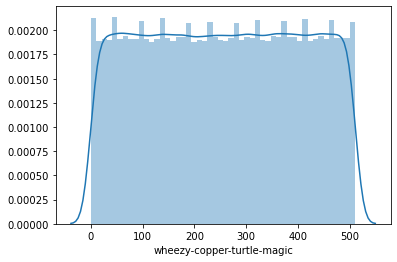

In [10]:
# 查看特征分布 取值均匀
col = 'wheezy-copper-turtle-magic'
sns.distplot(train[col])

## 考察该特征对其他特征的影响

 - 可以查看原始特征的分布以及对关键特征分组后的特征分布，来确定 该特征的重要性

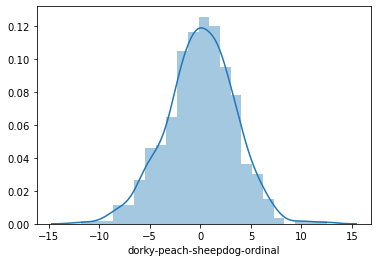

In [14]:
col = 'dorky-peach-sheepdog-ordinal'
sns.distplot(train[train['wheezy-copper-turtle-magic'] == 12][col])

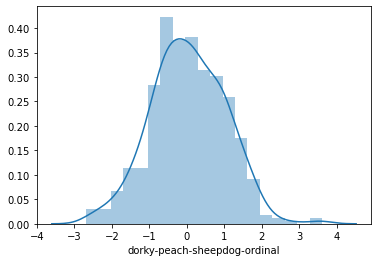

In [12]:
col = 'dorky-peach-sheepdog-ordinal'
sns.distplot(train[train['wheezy-copper-turtle-magic'] == 10][col])

## 对特征进行分组的情况下进行模型拟合

In [45]:
skf = StratifiedKFold(n_splits=10, shuffle=True)
train_oof = np.zeros(train.shape[0])
test_oof = np.zeros(test.shape[0])

from sklearn.linear_model import LogisticRegression
for trn_idx, val_idx in skf.split(train.values, target.values):
    
    # 数据集交叉验证划分
    x_train = train.iloc[trn_idx]
    x_val, y_val = train.iloc[val_idx][feature_names], target.iloc[val_idx]
    
    for i in tqdm(range(512)):
        # 特征分组
        x_train2 = x_train[x_train['wheezy-copper-turtle-magic'] == i]
        x_val2 = x_val[x_val['wheezy-copper-turtle-magic'] == i]
        test2 = test[test['wheezy-copper-turtle-magic'] == i]
        
        clf = LogisticRegression()
        clf.fit(x_train2[feature_names], x_train2.target)
        
        train_oof[x_val2.index] = clf.predict_proba(x_val2)[:, 1]
        test_oof[test2.index] += clf.predict_proba(test2[feature_names])[:, 1]
    
    # break

100%|██████████| 512/512 [00:33<00:00, 15.39it/s]


In [48]:
roc_auc_score(target[val_idx], train_oof[val_idx])

0.7194074717511022